# Impelementing pre-trained models

In [1]:
#Warning: If you run this notebook, models will be installed to your computer.

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Hugging Face

In [3]:
#!pip3 install transformers

### GPT

In [4]:
from transformers import pipeline
from transformers import set_seed

generator = pipeline('text-generation', model='gpt2')
set_seed(42) #this line is for you to get the same results, remove it if you want randomness
generator("I love pre-trained", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I love pre-trained animals. I want it to evolve. I want it to learn. I want people to think they're doing it for the"},
 {'generated_text': "I love pre-trained athletes in general and in this case, I'm taking the following three steps:\n\n1. Start talking with your coach"},
 {'generated_text': "I love pre-trained dogs! They bring me much joy and happiness as I've been a part of our family since I was a child, and"},
 {'generated_text': 'I love pre-trained work."\n\nKhan\'s book is based on a memoir by Khatooni, a native of Saitama'},
 {'generated_text': "I love pre-trained, long term people. And I hate to have them get in trouble with me because I didn't do that, but we"}]

### BERT

In [5]:
bert_classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [6]:
bert_classifier("This course is perfect!")

[{'label': 'POSITIVE', 'score': 0.9998729228973389}]

In [7]:
bert_classifier("This course could be better.")

[{'label': 'NEGATIVE', 'score': 0.9842697381973267}]

### Available Pipelines on HuggingFace

- `feature-extraction`
- `fill-mask`
- `ner` (named entity recognition)
- `question-answering`
- `sentiment-analysis`
- `summarization`
- `text-generation`
- `translation`
- `zero-shot-classification`

  source: https://huggingface.co/docs/transformers/main_classes/pipelines

## Pytorch

In [8]:
#!pip3 install torch torchvision

In [9]:
import torch
import torchvision.models as models

In [10]:
dir(models) #available models from torchvision

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

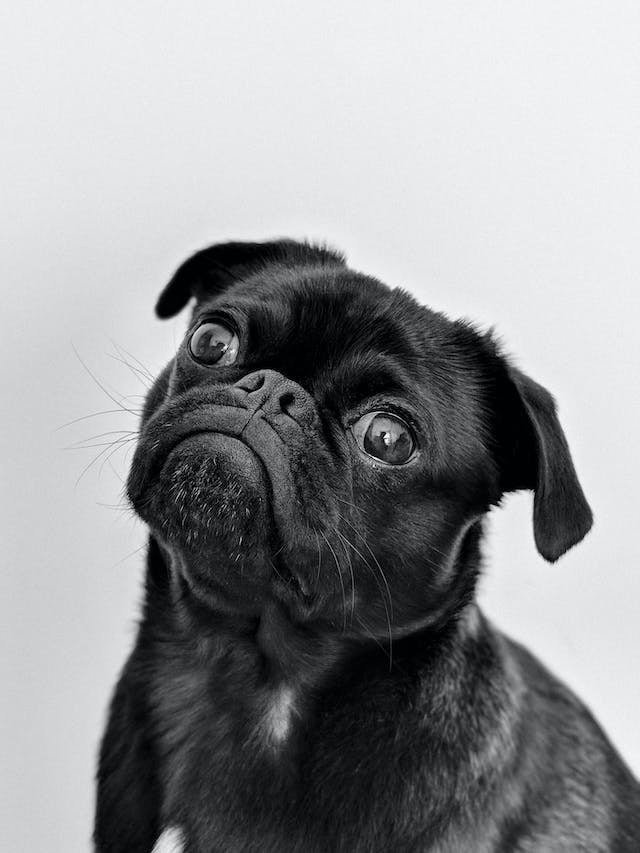

In [11]:
from PIL import Image
show_img = Image.open('dog.jpg') 
#Photo by Charles: https://www.pexels.com/photo/portrait-photo-of-an-adult-black-pug-1851164/
show_img

### RESNET

In [12]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights

img = read_image("dog.jpg")

#Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()

#Initialize the inference transforms
preprocess = weights.transforms()

#Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

#Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

pug: 54.4%


In [17]:
weights.meta['categories']

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

### VGG

In [13]:
# Load the pre-trained VGG16 model
vgg = models.vgg16(pretrained=True)

# Put the model in evaluation mode
vgg.eval()


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
import torchvision.transforms as transforms

# Define the image transformation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the image
img = Image.open("dog.jpg")

# Apply the transform to your image
img_t = transform(img)

# Add a batch dimension
batch_t = torch.unsqueeze(img_t, 0)


In [15]:
# Forward pass, get the output from the model
with torch.no_grad():
    output = vgg(batch_t)

probabilities = torch.nn.functional.softmax(output[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)


In [16]:
print(f"{top5_prob[0] * 100:.2f}%", "|", weights.meta['categories'][top5_catid[0]])
print(f"{top5_prob[1] * 100:.2f}%", "|", weights.meta['categories'][top5_catid[1]])
print(f"{top5_prob[2] * 100:.2f}%", "|", weights.meta['categories'][top5_catid[2]])
print(f"{top5_prob[3] * 100:.2f}%", "|", weights.meta['categories'][top5_catid[3]])
print(f"{top5_prob[4] * 100:.2f}%", "|", weights.meta['categories'][top5_catid[4]])

75.39% | pug
23.85% | Brabancon griffon
0.37% | French bulldog
0.20% | muzzle
0.07% | bow tie
